<a href="https://colab.research.google.com/github/timlickert/PJS_Seminararbeit/blob/main/PCA_Projektseminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Fundamentals


In [1]:
!git clone https://github.com/timlickert/PJS_Seminararbeit/

fatal: destination path 'PJS_Seminararbeit' already exists and is not an empty directory.


In [ ]:
!pip install psynlig

# 2. Scree Plot

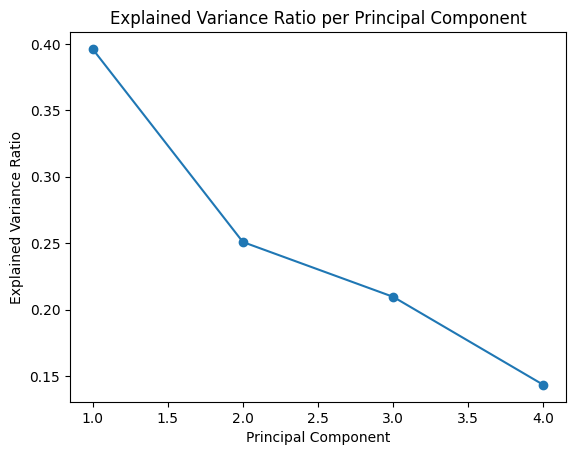

          PC1       PC2
0   -0.550569  1.734841
1   -0.624661  1.691311
2   -0.184661  1.662768
3   -0.590772  1.673448
4   -0.549830  1.705274
..        ...       ...
458 -0.540193 -1.686755
459  0.234999 -1.746099
460 -0.539824 -1.701539
461 -0.506120 -1.712011
462  2.590182 -1.877320

[463 rows x 2 columns]


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace this with your actual data loading code)
data_frame = pd.read_excel('/content/PJS_Seminararbeit/Log_Daten_komprimiert.xlsx', sheet_name='Pivot')

# Extract the error columns (4 columns representing errors) for PCA
error_columns = data_frame.iloc[:, 0:4]

# Standardize the error data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
error_data_scaled = scaler.fit_transform(error_columns)

# Create a PCA instance
pca = PCA()

# Fit the PCA model to your error data
pca.fit(error_data_scaled)

# Get the explained variance ratio of each principal component
explained_var_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()

# Choose the number of principal components you want to keep based on the plot
num_components_to_keep = 2  # Replace this with your desired number

# Perform PCA with the chosen number of components
pca = PCA(n_components=num_components_to_keep)
error_data_pca = pca.fit_transform(error_data_scaled)

# Create a DataFrame to store the PCA results
pca_df = pd.DataFrame(data=error_data_pca, columns=['PC1', 'PC2'])  # Change column names as needed

# Print the PCA-transformed data
print(pca_df)

# 3. Loading Plot

<ipython-input-10-d46192c2e6be>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


Position of PC1: (0.37, 0.91, 0.18)
Position of PC2: (0.51, -0.36, 0.76)
Position of PC3: (0.56, -0.18, -0.26)
Position of PC4: (0.55, -0.11, -0.57)


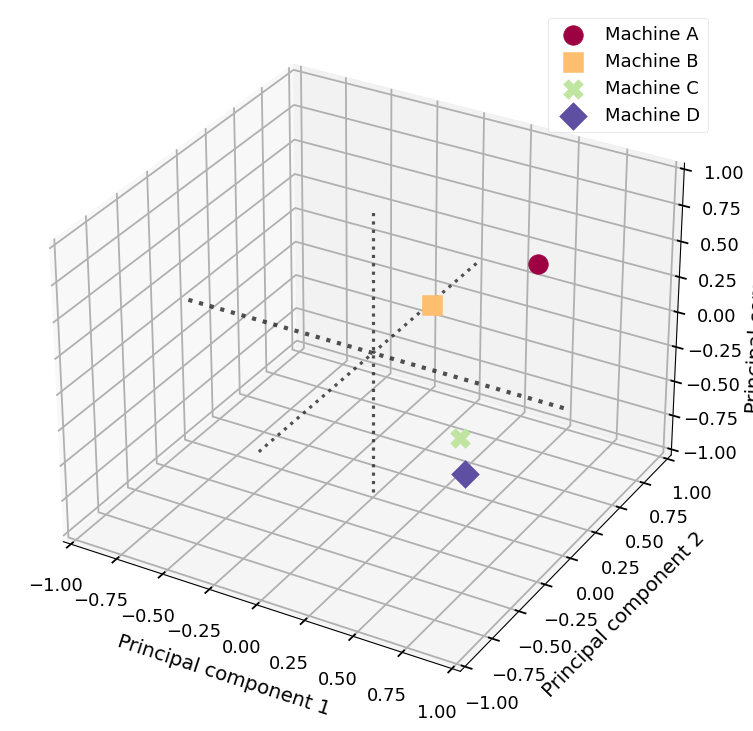

<Figure size 400x400 with 0 Axes>

In [10]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from psynlig import pca_3d_loadings
plt.style.use('seaborn-talk')

# Specify the sheet name and range of column indices for the table
sheet_name = 'Pivot'  # Replace with the actual sheet name
start_col_index = 1  # Index of the starting column (B)
end_col_index = 4    # Index of the ending column (E)

# Load data from the specified sheet and columns
data_path = '/content/PJS_Seminararbeit/Log_Daten_komprimiert.xlsx'  # Replace with the actual path to your Excel file
data = pd.read_excel(data_path, sheet_name=sheet_name, usecols=range(start_col_index, end_col_index + 1), skiprows=1)

# Convert column names to strings
data.columns = data.columns.astype(str)

# Impute missing values using the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Scale the imputed data
data_scaled = scale(data_imputed)

pca = PCA()
transformed_data = pca.fit_transform(data_scaled)

# Print positions of principal components in the console
for i, (x, y, z) in enumerate(pca.components_[:3].T):
    print(f"Position of PC{i+1}: ({x:.2f}, {y:.2f}, {z:.2f})")

# Remove text from plot and add legend for the last visualization, with custom labels:
_, axes = pca_3d_loadings(
    pca,
    data.columns,  # Use original column names
    select_components={(1, 2, 3)},
    cmap='Spectral',
    text_settings={'show': False},
)
legend_labels = ['Machine A', 'Machine B', 'Machine C', 'Machine D']
for axi, label in zip(axes, legend_labels):
    axi.legend([label])

# Set a single legend for all subplots
plt.legend(legend_labels)

# Set a larger figure size to accommodate the labels
plt.figure(figsize=(4, 4))  # Adjust width and height as needed

plt.show()